<a href="https://colab.research.google.com/github/jinglescode/meditorch/blob/master/demo/unet_resnet_synthetic_images_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get packages

In [0]:
!pip install meditorch

# Data

In [0]:
from meditorch.datasets import SyntheticImagesMasks
from torch.utils.data import DataLoader
syndata = SyntheticImagesMasks()

train_set_synthetic = SyntheticImagesMasks(size=1000)
val_set_synthetic = SyntheticImagesMasks(size=100)

batch_size = 25

dataloaders_synthetic = {
    'train': DataLoader(train_set_synthetic, batch_size=batch_size, shuffle=True, num_workers=2),
    'val': DataLoader(val_set_synthetic, batch_size=batch_size, shuffle=True, num_workers=2)
}

# Model

In [12]:
from meditorch.nn.models import UNetResNet
from torchsummary import summary

model = UNetResNet(in_channel=3, n_classes=6)

print(model)

UNetResNet(
  (base_model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tra

# Train

Epoch 1/20:
	learning rate: 1.00e-04
	train-> bce:0.160798|dice:0.988998|iou:0.000572|loss:0.574898
	val  -> bce:0.030492|dice:0.974126|iou:0.000000|loss:0.502309
	Saving best model, epoch loss 0.502309 < best loss 10000000000.000000
	1m 14s
----------
Epoch 2/20:
	learning rate: 1.00e-04
	train-> bce:0.023773|dice:0.866098|iou:0.113232|loss:0.444935
	val  -> bce:0.019598|dice:0.798171|iou:0.153527|loss:0.408884
	Saving best model, epoch loss 0.408884 < best loss 0.502309
	1m 14s
----------
Epoch 3/20:
	learning rate: 1.00e-04
	train-> bce:0.016066|dice:0.604338|iou:0.368155|loss:0.310202
	val  -> bce:0.012759|dice:0.435916|iou:0.528693|loss:0.224338
	Saving best model, epoch loss 0.224338 < best loss 0.408884
	1m 14s
----------
Epoch 4/20:
	learning rate: 1.00e-04
	train-> bce:0.009472|dice:0.347700|iou:0.643405|loss:0.178586
	val  -> bce:0.005132|dice:0.257551|iou:0.777097|loss:0.131342
	Saving best model, epoch loss 0.131342 < best loss 0.224338
	1m 14s
----------
Epoch 5/20:
	learn

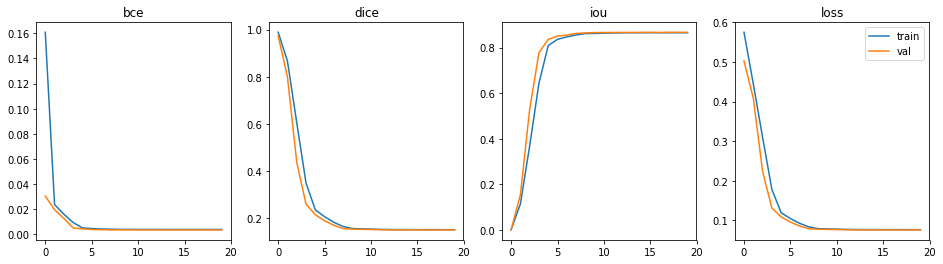

In [13]:
import torch.optim as optim
from torch.optim import lr_scheduler
from meditorch.nn import Trainer

optimizer_func = optim.Adam(model.parameters(), lr=1e-4)
scheduler = lr_scheduler.StepLR(optimizer_func, step_size=4, gamma=0.1)

trainer = Trainer(model, optimizer=optimizer_func, scheduler=scheduler)
trainer.train_model(dataloaders_synthetic, num_epochs=20)

# Test

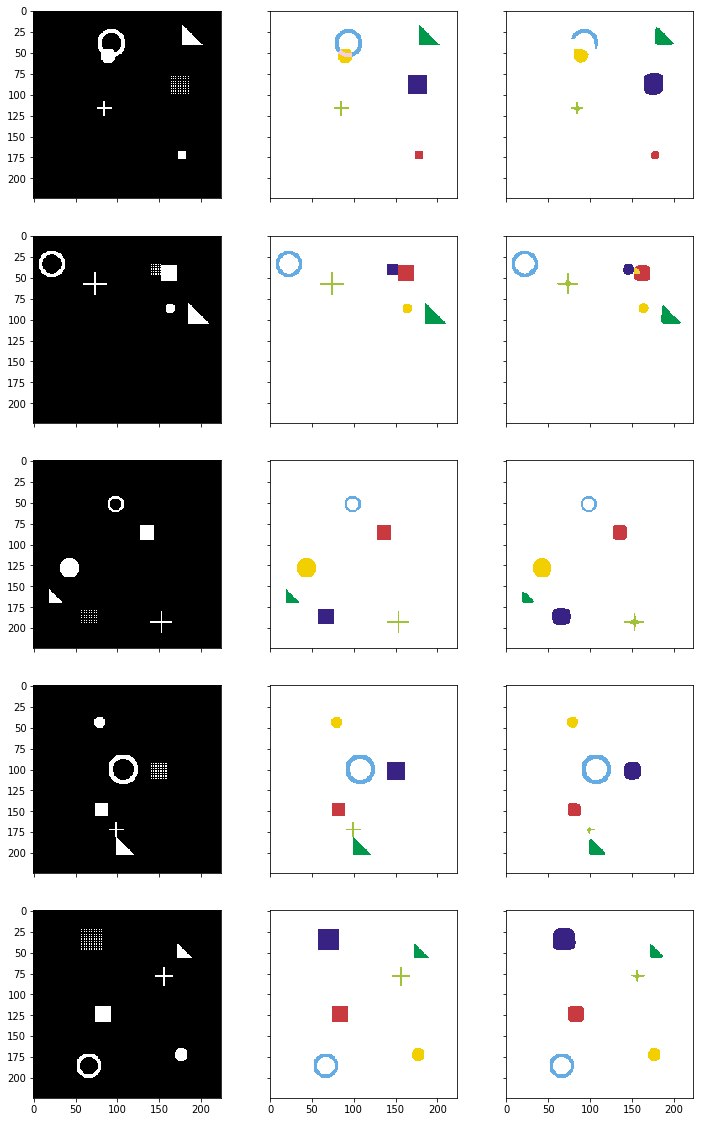

In [14]:
images, masks = next(iter(dataloaders_synthetic['val']))
preds = trainer.predict(images)

from meditorch.utils.plot import plot_image_truemask_predictedmask
num_samples = 5
plot_image_truemask_predictedmask(images[:num_samples], masks[:num_samples], preds[:num_samples])